# Functions

In [1]:
import pandas as pd
import itertools
import numpy as np
import random
import matplotlib.pyplot as plt
#####################################################################################################  
def build_uf_population_mapping(input_csv_path, output_csv_path):
    import pandas as pd
    # read the input CSV containing UF-level population estimates
    df_uf = pd.read_csv(input_csv_path, sep=';')
    # define the list of Brazilian state abbreviations (UF codes)
    uf = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PA','PB',
          'PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']
    # define the corresponding full names of Brazilian states
    uf_name = ['Acre','Alagoas','Amapá','Amazonas','Bahia','Ceará','Distrito Federal','Espírito Santo','Goiás',
               'Maranhão','Mato Grosso','Mato Grosso do Sul','Minas Gerais','Pará','Paraíba','Paraná','Pernambuco',
               'Piauí','Rio de Janeiro','Rio Grande do Norte','Rio Grande do Sul','Rondônia','Roraima','Santa Catarina',
               'São Paulo','Sergipe','Tocantins']
    # create a lookup DataFrame mapping UF codes to full state names
    df_uf_depara = pd.DataFrame(list(zip(uf, uf_name)), columns=['uf','uf_name'])
    # merge the original dataset with the UF name mapping
    df_uf = pd.merge(df_uf, df_uf_depara, how='left', left_on='uf', right_on='uf').reset_index()
    # write the enriched DataFrame to a CSV file using UTF-8 encoding
    df_uf.to_csv(output_csv_path, sep=';', encoding='utf-8', index=False)
    # return the resulting DataFrame for further use if needed
    return df_uf
#####################################################################################################
def create_artist_list1(artist, cd, n_track):  # define function to generate artist–CD–track combinations
    # create a list of track identifiers from track1 to track(n_track+1)
    track_list = ['track' + str(i + 1) for i in range(n_track + 1)]
    # group artist, cd, and track list into a list of iterables for cartesian product
    list_df = [[artist], [cd], track_list]
    # initialize empty list to store flattened cartesian product
    list_extend = []
    # iterate over cartesian product of artist, cd, and tracks
    for element in itertools.product(*list_df):
        # extend the list with each tuple element
        list_extend.extend(element)
    # reshape the flat list into a matrix with 3 columns
    list_artist = np.reshape(list_extend, (n_track + 1, 3))
    # create DataFrame with proper column names
    df = pd.DataFrame(list_artist, columns=['artist', 'cd', 'cd_track'])
    # return the resulting DataFrame
    return df
#####################################################################################################  
def create_df_artist_list1():  # define function to create fixed artist catalog
    # generate artist01 catalogs
    df11 = create_artist_list1('artist01', 'cd01', 5)
    df12 = create_artist_list1('artist01', 'cd02', 8)
    df13 = create_artist_list1('artist01', 'cd03', 6)
    # generate artist02 catalogs
    df21 = create_artist_list1('artist02', 'cd01', 7)
    df22 = create_artist_list1('artist02', 'cd01', 9)
    # generate artist03 catalogs
    df31 = create_artist_list1('artist03', 'cd01', 11)
    df32 = create_artist_list1('artist03', 'cd02', 10)
    df33 = create_artist_list1('artist03', 'cd03', 6)
    # generate artist04 catalogs
    df41 = create_artist_list1('artist04', 'cd01', 8)
    df42 = create_artist_list1('artist04', 'cd02', 7)
    df43 = create_artist_list1('artist04', 'cd03', 9)
    # generate artist05 catalogs
    df51 = create_artist_list1('artist05', 'cd01', 8)
    df52 = create_artist_list1('artist05', 'cd02', 7)
    df53 = create_artist_list1('artist05', 'cd03', 9)
    # generate artist06 catalogs
    df61 = create_artist_list1('artist06', 'cd01', 8)
    df62 = create_artist_list1('artist06', 'cd02', 7)
    df63 = create_artist_list1('artist06', 'cd03', 9)
    # generate artist07 catalogs
    df71 = create_artist_list1('artist07', 'cd01', 8)
    df72 = create_artist_list1('artist07', 'cd02', 7)
    df73 = create_artist_list1('artist07', 'cd03', 9)
    # generate artist08 catalogs
    df81 = create_artist_list1('artist08', 'cd01', 8)
    df82 = create_artist_list1('artist08', 'cd02', 7)
    df83 = create_artist_list1('artist08', 'cd03', 9)
    # generate artist09 catalogs
    df91 = create_artist_list1('artist09', 'cd01', 8)
    df92 = create_artist_list1('artist09', 'cd02', 7)
    df93 = create_artist_list1('artist09', 'cd03', 9)
    # generate artist10 catalogs
    df101 = create_artist_list1('artist10', 'cd01', 8)
    df102 = create_artist_list1('artist10', 'cd02', 7)
    df103 = create_artist_list1('artist10', 'cd03', 9)
    # concatenate all artist DataFrames
    df = pd.concat([df11, df12, df13, df21, df22, df31, df32, df33, df41, df42, df43,
                    df51, df52, df53, df61, df62, df63, df71, df72, df73, df81, df82,
                    df83, df91, df92, df93, df101, df102, df103])
    # create composite key artist_cd
    df['key_artist_cd'] = df['artist'] + '_' + df['cd']
    # create composite key cd_track
    df['key_cd_track'] = df['cd'] + '_' + df['cd_track']
    # create composite key artist_cd_track
    df['key_artist_cd_track'] = df['artist'] + '_' + df['cd'] + '_' + df['cd_track']
    # return final DataFrame
    return df
##################################################################################################### 
# define random time series generator
def random_timeseries(initial_value: float, volatility: float, count: int) -> list:  
    time_series = [initial_value]  # initialize series with initial value
    for _ in range(count):  # iterate for number of time steps
        if time_series[-1] < 0:  # check if last value is negative
            time_series[-1] = round(initial_value * abs(random.gauss(0, 1)) * volatility)  # reset with positive shock
            time_series.append(time_series[-1])  # append corrected value
        else:
            time_series.append(time_series[-1] + round(initial_value * random.gauss(0, 1) * volatility))  # random walk
    return time_series  # return generated time series
#####################################################################################################  
# define stochastic artist catalog generator
def create_artist_list2(artist, n_max_cd, n_max_track):
    if n_max_cd < 1:
        raise ValueError("n_max_cd must be >= 1")
    if n_max_track < 1:
        raise ValueError("n_max_track must be >= 1")
    list1 = [artist]
    n_cd = n_max_cd
    list2 = [['cd' + str(j)] for j in range(1, n_cd + 1)]
    list_df = []
    for cd in list2:
        n_track = n_max_track
        tracks = ['track' + str(i) for i in range(1, n_track + 1)]
        rows = []
        for element in itertools.product(list1, cd, tracks):
            rows.append(element)
        df_iter = pd.DataFrame(rows, columns=['artist', 'cd', 'cd_track'])
        list_df.append(df_iter)
    df = pd.concat(list_df, ignore_index=True)
    return df
##################################################################################################### 
def create_df_artist_list2(n, n_max_cd, n_max_track):  # define function to create multiple artists dynamically
    list_df = []  # initialize empty list to store intermediate DataFrames
    for i in range(1, n + 1):  # loop over artist indices
        # generate artist catalog for current artist
        df_iter = create_artist_list2('artist' + str(i), n_max_cd, n_max_track)  
        list_df.append(df_iter)  # append DataFrame to list instead of using deprecated append
    df = pd.concat(list_df, ignore_index=True)  # concatenate all DataFrames at once efficiently
    df['key_artist_cd'] = df['artist'] + '_' + df['cd']  # create composite key artist_cd
    df['key_cd_track'] = df['cd'] + '_' + df['cd_track']  # create composite key cd_track
    df['key_artist_cd_track'] = df['artist'] + '_' + df['cd'] + '_' + df['cd_track']  # create full composite key
    return df  # return final DataFrame
#####################################################################################################  
def prob_priori(df):  # define prior probability by UF
    if df['uf'] == 'AC': return 0.01  # Acre
    if df['uf'] == 'AL': return 0.60  # Alagoas
    if df['uf'] == 'AP': return 0.10  # Amapá
    if df['uf'] == 'AM': return 0.10  # Amazonas
    if df['uf'] == 'BA': return 0.60  # Bahia
    if df['uf'] == 'CE': return 0.60  # Ceará
    if df['uf'] == 'DF': return 0.10  # Distrito Federal
    if df['uf'] == 'ES': return 0.10  # Espírito Santo
    if df['uf'] == 'GO': return 0.10  # Goiás
    if df['uf'] == 'MA': return 0.60  # Maranhão
    if df['uf'] == 'MT': return 0.10  # Mato Grosso
    if df['uf'] == 'MS': return 0.10  # Mato Grosso do Sul
    if df['uf'] == 'MG': return 0.10  # Minas Gerais
    if df['uf'] == 'PA': return 0.10  # Pará
    if df['uf'] == 'PB': return 0.60  # Paraíba
    if df['uf'] == 'PR': return 0.01  # Paraná
    if df['uf'] == 'PE': return 0.60  # Pernambuco
    if df['uf'] == 'PI': return 0.60  # Piauí
    if df['uf'] == 'RJ': return 0.40  # Rio de Janeiro
    if df['uf'] == 'RN': return 0.60  # Rio Grande do Norte
    if df['uf'] == 'RS': return 0.10  # Rio Grande do Sul
    if df['uf'] == 'RO': return 0.10  # Rondônia
    if df['uf'] == 'RR': return 0.10  # Roraima
    if df['uf'] == 'SC': return 0.10  # Santa Catarina
    if df['uf'] == 'SP': return 0.40  # São Paulo
    if df['uf'] == 'SE': return 0.60  # Sergipe
    if df['uf'] == 'TO': return 0.10  # Tocantins
##################################################################################################### 
def prob_uf_calc():  # compute UF probability distribution
    uf = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PA','PB','PR','PE','PI','RJ','RN',
          'RS','RO','RR','SC','SP','SE','TO']  # UF codes
    uf_name = ['Acre','Alagoas','Amapá','Amazonas','Bahia','Ceará','Distrito Federal','Espírito Santo','Goiás',
               'Maranhão', 'Mato Grosso','Mato Grosso do Sul','Minas Gerais','Pará','Paraíba','Paraná','Pernambuco',
               'Piauí', 'Rio de Janeiro','Rio Grande do Norte','Rio Grande do Sul','Rondônia','Roraima',
               'Santa Catarina', 'São Paulo','Sergipe','Tocantins']  # UF names
    df_uf_depara = pd.DataFrame(list(zip(uf, uf_name)), columns=['uf','uf_name'])  # mapping DataFrame
    df_pop = pd.DataFrame(df_uf.groupby(['uf']).agg({'populacao_estimada':'sum'})).reset_index()  # aggregate population
    df_pop['pop_perc'] = df_pop['populacao_estimada'] / sum(df_pop['populacao_estimada'])  # population share
    df_pop = pd.merge(df_pop, df_uf_depara, how='left', left_on='uf', right_on='uf').reset_index()  # merge names
    df_pop['prob_uf_sm'] = df_pop.apply(prob_priori, axis=1)  # apply prior
    df_pop['prob_uf'] = df_pop['prob_uf_sm'] * df_pop['pop_perc']  # weighted probability
    list_prob_uf = list(df_pop['prob_uf'])  # extract probabilities
    list_uf = list(df_pop['uf'])  # extract UF labels
    return list_prob_uf, list_uf  # return both lists
##################################################################################################### 
def create_clusters_df(n, mu_age, sd_age, prob_female, prob_male, cluster_name):
    array_age = np.random.normal(mu_age, sd_age, n)
    sex = ['F', 'M']
    prob_sex = [prob_female, prob_male]
    list_prob_uf, list_uf = prob_uf_calc()
    array_sex = random.choices(population=sex, weights=prob_sex, k=n)
    array_uf = random.choices(population=list_uf, weights=list_prob_uf, k=n)
    data = list(zip(array_age, array_sex, array_uf))
    columns = ['age_years', 'sex', 'uf']
    df = pd.DataFrame(data, columns=columns)
    df['cluster'] = cluster_name
    df['id_user'] = df[['age_years', 'sex', 'uf']].astype(str).sum(axis=1).map(hash)
    df['prob_uf_sm'] = df.apply(prob_priori, axis=1)
    df['id_user'] = df['id_user'].astype(str)
    df.reset_index(drop=True, inplace=True)
    return df
#####################################################################################################  
# generate play time series
def create_ts_plays_per_track(df, start_date, n_days, ts_max_init_value):  
    track_list = df.key_artist_cd_track.unique()  # extract unique tracks
    n = n_days  # number of days
    ts={f'{track}': random_timeseries(random.randint(0, ts_max_init_value), random.random(), n) for track in track_list}
    ts_dict = {}  # initialize dictionary
    ts_dict['time_series'] = ts  # store time series
    all_ts = np.stack(list(ts_dict['time_series'].values())).reshape(len(track_list), -1)  # stack arrays
    df_ts = pd.DataFrame(all_ts.T)  # transpose and convert to DataFrame
    df_ts.columns = ts_dict['time_series'].keys()  # assign column names
    df_ts['date_play'] = pd.date_range(start=start_date, periods=len(df_ts), freq='D')  # create dates
    df_ts['day_of_week'] = df_ts['date_play'].dt.day_name()  # extract weekday
    df_ts['day_of_play'] = df_ts['date_play'].dt.day  # extract day
    df_ts['month_of_play'] = df_ts['date_play'].dt.month  # extract month
    df_ts['year_of_play'] = df_ts['date_play'].dt.year  # extract year
    df_ts['year_month_play'] = ((df_ts['year_of_play'] * 100) + df_ts['month_of_play']).astype(str)  # year-month key
    return df_ts  # return time series DataFrame
#####################################################################################################
def create_df_events(df, df_user, number_ticks, number_users_per_tick, start_period, freq_ticks):
    # assign number of time ticks (events in time)
    n_ticks = number_ticks
    # assign maximum number of users per tick
    n_tracks = number_users_per_tick
    # extract list of user identifiers from df_user
    list_users = list(df_user['id_user'])
    # extract user sampling probabilities from df_user
    list_users_prob = list(df_user['prob_uf_sm'])
    # extract list of track identifiers from df
    list_cd_tracks = list(df['key_artist_cd_track'])
    # extract track sampling probabilities from df
    list_cd_tracks_prob = list(df['plays_perc'])
    # create events DataFrame with dates and sampled users/tracks per tick
    df_events = pd.DataFrame({
        # generate date range for each tick
        'date_event': pd.date_range(start=start_period, periods=n_ticks, freq=freq_ticks),
        # sample users per tick with replacement and weighted probabilities
        'id_user': [random.choices(list_users, weights=list_users_prob, k=random.randint(0, n_tracks)) for i in range(n_ticks)],
        # sample tracks per tick with replacement and weighted probabilities
        'key_artist_cd_track': [random.choices(list_cd_tracks, weights=list_cd_tracks_prob, k=random.randint(0, n_tracks)) for i in range(n_ticks)]
    })
    # expand list of users into individual rows with explicit dtype to avoid FutureWarning
    s = df_events['id_user'].apply(lambda x: pd.Series(x, dtype='object')).stack().reset_index(level=0, drop=True)
    # assign column name to expanded user series
    s.name = 'id_user'
    # replace list column with expanded user rows
    df_events = df_events.drop('id_user', axis=1).join(s)
    # expand list of tracks into individual rows with explicit dtype to avoid FutureWarning
    r = df_events['key_artist_cd_track'].apply(lambda x: pd.Series(x, dtype='object')).stack().reset_index(level=0, drop=True)
    # assign column name to expanded track series
    r.name = 'key_artist_cd_track'
    # replace list column with expanded track rows
    df_events = df_events.drop('key_artist_cd_track', axis=1).join(r)
    # remove duplicated user events per date and drop missing values
    df_events = df_events.drop_duplicates(subset=['date_event', 'id_user']).dropna().reset_index(drop=True)
    # return final events DataFrame
    return df_events
#####################################################################################################
def add_track_play_statistics(df, df_ts):
    # select only numeric columns from the time series DataFrame
    df_ts_numeric = df_ts.select_dtypes(include='number')
    # compute total number of plays per track
    df_track_count = pd.DataFrame(df_ts_numeric.sum(axis=0, skipna=True)).reset_index()
    # rename columns to meaningful names
    df_track_count = df_track_count.rename(columns={
        'index': 'key_artist_cd_track',
        0: 'plays'
    })
    # merge track play counts into the catalog DataFrame
    df = pd.merge(df,
                  df_track_count,
                  how='left',
                  on='key_artist_cd_track')
    # compute relative play share per track
    df['plays_perc'] = df['plays'] / df['plays'].sum()
    # return enriched DataFrame
    return df

# Pipeline

## Creates the df with population size

In [2]:
df_uf = build_uf_population_mapping('estimativa_dou_2021.csv', output_csv_path = 'uf_populacao_br_2021.csv')

## Creates the df with artists, tracks, cds

In [3]:
df1 = create_df_artist_list1()
df1

,artist,cd,cd_track,key_artist_cd,key_cd_track,key_artist_cd_track
0,artist01,cd01,track1,artist01_cd01,cd01_track1,artist01_cd01_track1
1,artist01,cd01,track2,artist01_cd01,cd01_track2,artist01_cd01_track2
2,artist01,cd01,track3,artist01_cd01,cd01_track3,artist01_cd01_track3
3,artist01,cd01,track4,artist01_cd01,cd01_track4,artist01_cd01_track4
4,artist01,cd01,track5,artist01_cd01,cd01_track5,artist01_cd01_track5
...,...,...,...,...,...,...
5,artist10,cd03,track6,artist10_cd03,cd03_track6,artist10_cd03_track6
6,artist10,cd03,track7,artist10_cd03,cd03_track7,artist10_cd03_track7
7,artist10,cd03,track8,artist10_cd03,cd03_track8,artist10_cd03_track8
8,artist10,cd03,track9,artist10_cd03,cd03_track9,artist10_cd03_track9


## Creates df with the artists, cd, tracks (optimized version)

In [4]:
df2 = create_df_artist_list2(n = 10, n_max_cd = 3, n_max_track = 15)
df2

,artist,cd,cd_track,key_artist_cd,key_cd_track,key_artist_cd_track
0,artist1,cd1,track1,artist1_cd1,cd1_track1,artist1_cd1_track1
1,artist1,cd1,track2,artist1_cd1,cd1_track2,artist1_cd1_track2
2,artist1,cd1,track3,artist1_cd1,cd1_track3,artist1_cd1_track3
3,artist1,cd1,track4,artist1_cd1,cd1_track4,artist1_cd1_track4
4,artist1,cd1,track5,artist1_cd1,cd1_track5,artist1_cd1_track5
...,...,...,...,...,...,...
445,artist10,cd3,track11,artist10_cd3,cd3_track11,artist10_cd3_track11
446,artist10,cd3,track12,artist10_cd3,cd3_track12,artist10_cd3_track12
447,artist10,cd3,track13,artist10_cd3,cd3_track13,artist10_cd3_track13
448,artist10,cd3,track14,artist10_cd3,cd3_track14,artist10_cd3_track14


## Creates df with the number of plays per artist, track, cd

In [5]:
df_ts = create_ts_plays_per_track(df = df2, start_date = '1/1/2021', n_days = 300 , ts_max_init_value = 10)
df_ts

,artist1_cd1_track1,artist1_cd1_track2,artist1_cd1_track3,artist1_cd1_track4,artist1_cd1_track5,artist1_cd1_track6,artist1_cd1_track7,artist1_cd1_track8,artist1_cd1_track9,artist1_cd1_track10,...,artist10_cd3_track12,artist10_cd3_track13,artist10_cd3_track14,artist10_cd3_track15,date_play,day_of_week,day_of_play,month_of_play,year_of_play,year_month_play
0,5,1,7,4,8,10,1,3,10,4,...,0,9,0,5,2021-01-01,Friday,1,1,2021,202101
1,1,2,3,8,7,0,1,2,14,2,...,0,12,0,1,2021-01-02,Saturday,2,1,2021,202101
2,5,3,1,4,5,12,1,4,11,3,...,0,12,0,5,2021-01-03,Sunday,3,1,2021,202101
3,5,3,3,3,14,12,1,2,11,8,...,0,13,0,13,2021-01-04,Monday,4,1,2021,202101
4,10,2,3,2,12,16,1,2,9,12,...,0,13,0,19,2021-01-05,Tuesday,5,1,2021,202101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,41,7,13,78,144,10,6,7,52,58,...,0,45,0,53,2021-10-24,Sunday,24,10,2021,202110
297,39,8,7,81,146,7,6,6,53,55,...,0,44,0,56,2021-10-25,Monday,25,10,2021,202110
298,39,7,6,86,143,14,6,6,56,56,...,0,43,0,60,2021-10-26,Tuesday,26,10,2021,202110
299,31,7,7,87,145,6,6,0,50,59,...,0,41,0,65,2021-10-27,Wednesday,27,10,2021,202110


## Creates dimensional table with users cluster

In [6]:
df_user = create_clusters_df(n = 1000, mu_age = 30, sd_age = 5, prob_female = 0.5, 
                              prob_male = 0.5, cluster_name = 'cluster01')
df_user

,age_years,sex,uf,cluster,id_user,prob_uf_sm
0,29.263128,F,BA,cluster01,-6224973009943483778,0.6
1,35.498088,F,SE,cluster01,1331853701145776385,0.6
2,29.535809,M,SP,cluster01,5496511615507929796,0.4
3,19.454919,F,CE,cluster01,-9018105022808967869,0.6
4,34.984913,F,RJ,cluster01,2997156756718759326,0.4
...,...,...,...,...,...,...
995,25.661443,F,RS,cluster01,8394393018883373477,0.1
996,29.898914,M,SP,cluster01,4270055510467379687,0.4
997,29.714861,F,MA,cluster01,5733664799255484173,0.6
998,23.783217,M,SP,cluster01,-7368972402557848731,0.4


## Creates analytical table with number of plays by artist

In [7]:
df = add_track_play_statistics(df2, df_ts)
df

,artist,cd,cd_track,key_artist_cd,key_cd_track,key_artist_cd_track,plays,plays_perc
0,artist1,cd1,track1,artist1_cd1,cd1_track1,artist1_cd1_track1,6115,0.001989
1,artist1,cd1,track2,artist1_cd1,cd1_track2,artist1_cd1_track2,2049,0.000666
2,artist1,cd1,track3,artist1_cd1,cd1_track3,artist1_cd1_track3,6262,0.002036
3,artist1,cd1,track4,artist1_cd1,cd1_track4,artist1_cd1_track4,10539,0.003427
4,artist1,cd1,track5,artist1_cd1,cd1_track5,artist1_cd1_track5,33555,0.010912
...,...,...,...,...,...,...,...,...
445,artist10,cd3,track11,artist10_cd3,cd3_track11,artist10_cd3_track11,908,0.000295
446,artist10,cd3,track12,artist10_cd3,cd3_track12,artist10_cd3_track12,0,0.000000
447,artist10,cd3,track13,artist10_cd3,cd3_track13,artist10_cd3_track13,7688,0.002500
448,artist10,cd3,track14,artist10_cd3,cd3_track14,artist10_cd3_track14,0,0.000000


## Creates plots of plays series

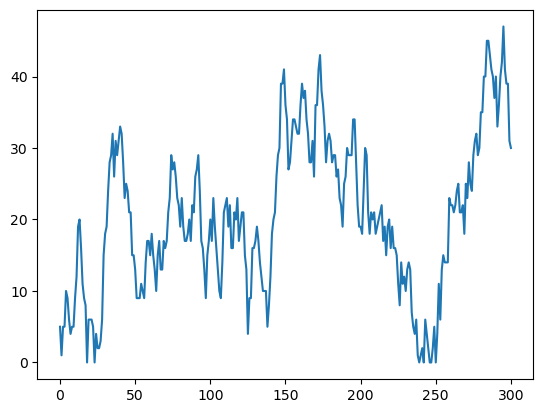

In [8]:
ts = df_ts['artist1_cd1_track1']
plt.plot(ts)
plt.show()

## Creates events table

In [9]:
df_events = create_df_events(df, df_user, number_ticks = 100, number_users_per_tick = 50, 
                             start_period = '1/1/2021', freq_ticks = '30Min')
df_events

,date_event,id_user,key_artist_cd_track
0,2021-01-01 00:00:00,-4536440994624576938,artist6_cd1_track5
1,2021-01-01 00:00:00,1143683016915025416,artist6_cd1_track5
2,2021-01-01 00:00:00,1897006843260192330,artist6_cd1_track5
3,2021-01-01 00:00:00,1305774654069648991,artist6_cd1_track5
4,2021-01-01 00:00:00,-5888431454807226724,artist6_cd1_track5
...,...,...,...
2327,2021-01-02 00:00:00,-8973838870738524604,artist5_cd3_track3
2328,2021-01-02 00:00:00,-7468932160131875035,artist5_cd3_track3
2329,2021-01-02 00:00:00,5594457962528660480,artist5_cd3_track3
2330,2021-01-02 00:00:00,8033478953467603710,artist5_cd3_track3


# A few notes

## Itertools basics

`itertools.product` is used to generate the Cartesian product between two or more iterables. In practical terms, it produces all possible ordered combinations where one element is taken from each iterable. In the code, two lists are defined: one containing the elements `a`, `b`, and `c`, and another containing the elements `x`, `y`, and `z`. The Cartesian product between these two lists generates every possible pair `(element_from_l1, element_from_l2)`. The call to `itertools.product(l1, l2)` returns an iterator, not a list. This iterator lazily generates each pair, meaning combinations are produced one at a time instead of being stored in memory all at once. Each element yielded by the iterator is a tuple. The `for` loop iterates over this iterator and prints each tuple. Since each list has three elements, the total number of generated pairs is (3 \times 3 = 9). The output corresponds exactly to what would be obtained with two nested loops, but in a more concise and expressive way. Conceptually, this operation is equivalent to writing a nested loop where the outer loop iterates over the first list and the inner loop iterates over the second list. `itertools.product` simply provides a clean, readable, and efficient abstraction for this very common combinatorial pattern.


In [10]:
# define the first list with three elements
l1 = ['a', 'b', 'c']
# define the second list with three elements
l2 = ['x', 'y', 'z']
# group the two lists into a single container (not strictly needed for product here)
list_test = [l1, l2]
# create a Cartesian product iterator between l1 and l2
p = itertools.product(l1, l2)
# iterate over each pair generated by the Cartesian product
for v in p:
    # print the current pair (tuple) from the Cartesian product
    print(v)

('a', 'x')
('a', 'y')
('a', 'z')
('b', 'x')
('b', 'y')
('b', 'z')
('c', 'x')
('c', 'y')
('c', 'z')


# References

* [Dynamically store data in the columns of pandas dataframe from numpy arrays being generated from “for loop”](https://stackoverflow.com/questions/67807397/dynamically-store-data-in-the-columns-of-pandas-dataframe-from-numpy-arrays-bein)
* https://note.nkmk.me/en/python-itertools-product/
* https://www.tutorialguruji.com/python/how-to-generate-random-time-series-data-with-noise-in-python-3/
* https://stackoverflow.com/questions/60393668/pandas-generate-unique-id-based-on-row-values
* https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element